# Ozone values for subset of days

In [ ]:
#load file for all dates
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.set_index('time_local', inplace=True)

#Take a subset of the days
subset_days = ['08-03','08-04','08-05','08-06','08-07','08-08']
df_subsetdays = df_alldays.sort_index().loc["2024-08-03":"2024-08-08"]

In [ ]:
df_ozone_merged = df_subsetdays['O3_ppbv'].to_frame()
df_ozone_merged_transposed = df_ozone_merged.T

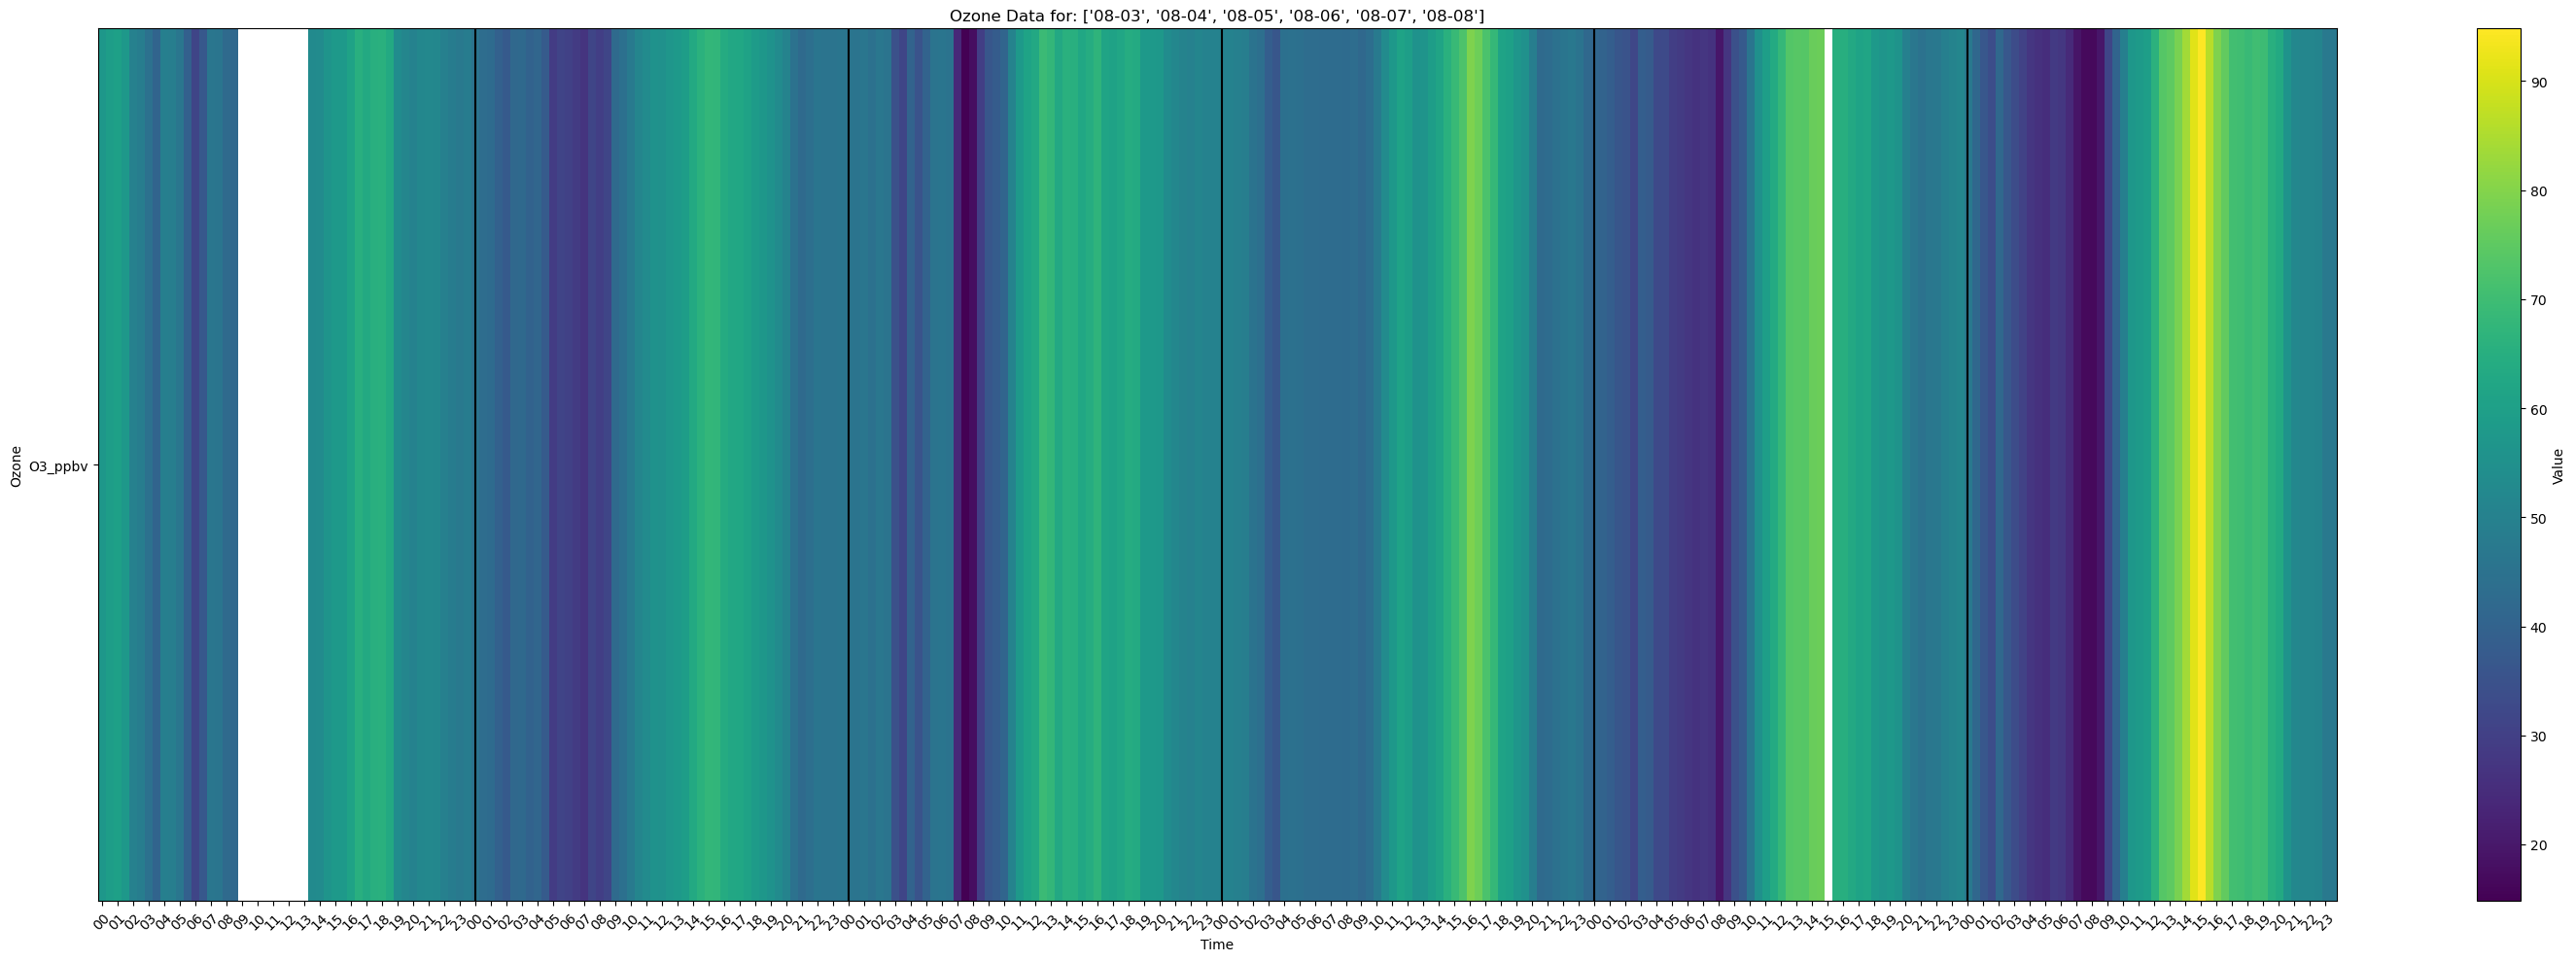

In [ ]:
# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_ozone_merged_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_ozone_merged_transposed.columns),2), labels=df_ozone_merged_transposed.columns.strftime('%H')[0::2], rotation = 45)
plt.yticks(ticks=np.arange(len(df_ozone_merged_transposed.index)), labels=df_ozone_merged_transposed.index)

for pos in range(48,len(df_ozone_merged_transposed.columns),48):
    plt.axvline(pos, color = 'black')
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.title('Ozone Data for: ' + str(subset_days))

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

Text(0.5, 1.0, "Ozone Data for: ['08-03', '08-04', '08-05', '08-06', '08-07', '08-08']")

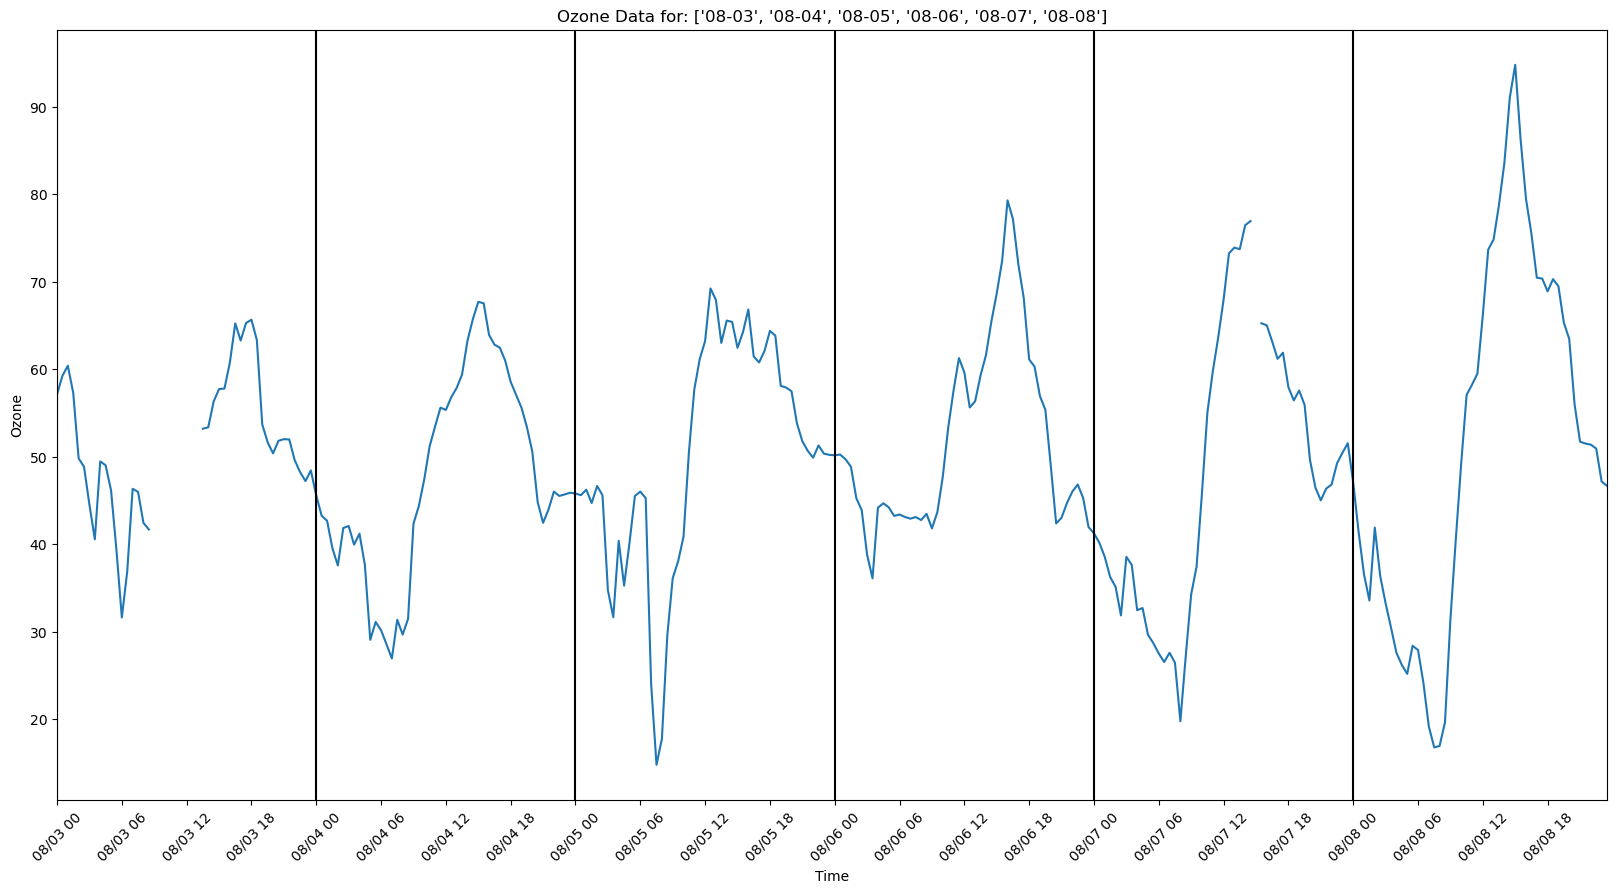

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.plot(df_ozone_merged.index, df_ozone_merged.values)
plt.margins(x=0)

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(0,len(df_ozone_merged.index),12):
    ozone_ticks.append(df_ozone_merged.index[ozone_tick_idx])
plt.xticks(ticks=ozone_ticks, labels=df_ozone_merged.index.strftime('%m/%d %H')[0::12], rotation = 45)

#Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(0,len(df_ozone_merged.index),48):
    midnight_vals.append(df_ozone_merged.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.xlabel('Time')
plt.ylabel('Ozone')
plt.title('Ozone Data for: ' + str(subset_days))

---

In [ ]:
max_display_options = ['display.max_seq_items', 'display.max_colwidth', 'display.max_dir_items', 'display.max_columns', 'display.max_rows']
for param in range(0,len(max_display_options)):
    pd.set_option(max_display_options[param], None)
# pd.set_option(max_display_options[1], None)
# pd.set_option(max_display_options[2], None)
# pd.set_option(max_display_options[3], None)


In [ ]:
# Step 1: Calculate the 8-hour rolling average
df_subset_ozone_days_hourly['O3_8hr_avg'] = df_ozone_merged_hourly['O3_ppbv'].rolling(window=8, min_periods=8).mean()
#rolling average only works for 8 hours with no gaps; at least 6 hours

# Step 2: Calculate the maximum 8-hour average for each day
# Resample to daily frequency, compute the daily max of the rolling averages, drop NA values
daily_max_8hr_avg_ozone = df_subset_ozone_days_hourly['O3_8hr_avg'].resample('D').max().dropna()
#print('Max 8 hr avg each day:\n', daily_max_8hr_avg_ozone)

# Step 3: Map the daily maximum back to the original dataframe
# Create a new temporary column with the daily max 8-hour average for each timestamp
df_ozone_merged_hourly['MDA8_O3'] = df_ozone_merged_hourly.index.floor('D').map(daily_max_8hr_avg_ozone)

#print('Daily max 8 hour avg for each timestamp: \n', df_ozone_merged['MDA8_O3'])
# Select daytime values only where MD8A > 65
df_ozone_day_exceedance = df_ozone_merged_hourly[(df_ozone_merged_hourly.index.hour >=7) & (df_ozone_merged_hourly.index.hour<=20) & (df_ozone_merged_hourly['MDA8_O3']>65)]
print('When is MDA8 > 65?\n', df_ozone_day_exceedance)

When is MDA8 > 65?
                        O3_ppbv    MDA8_O3
time_local                               
2024-08-07 07:00:00  27.060583  66.312976
2024-08-07 08:00:00  23.330694  66.312976
2024-08-07 09:00:00  33.326500  66.312976
2024-08-07 10:00:00  46.068028  66.312976
2024-08-07 11:00:00  59.546500  66.312976
2024-08-07 12:00:00  68.204444  66.312976
2024-08-07 13:00:00  73.757194  66.312976
2024-08-07 14:00:00  75.932803  66.312976
2024-08-07 15:00:00  69.165404  66.312976
2024-08-07 16:00:00  64.573750  66.312976
2024-08-07 17:00:00  61.877028  66.312976
2024-08-07 18:00:00  57.446686  66.312976
2024-08-07 19:00:00  56.893778  66.312976
2024-08-07 20:00:00  50.437778  66.312976
2024-08-08 07:00:00  19.847472  76.006722
2024-08-08 08:00:00  17.599778  76.006722
2024-08-08 09:00:00  30.779389  76.006722
2024-08-08 10:00:00  49.051694  76.006722
2024-08-08 11:00:00  58.275944  76.006722
2024-08-08 12:00:00  66.399556  76.006722
2024-08-08 13:00:00  75.497587  76.006722
2024-08-08 14:

---

# MDA8 Ozone All Days

In [ ]:
alldays_30min_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
alldays_30min_filepath_load = xr.open_dataset(alldays_30min_filepath)
df_alldays_30min = alldays_30min_filepath_load.to_dataframe()

In [ ]:
#Where are the NaNs? This will help us choose which days to cut off in the beginning
for o3_val in range(0,len(df_alldays_30min['O3_ppbv'])):
    nan_check = np.isnan(df_alldays_30min['O3_ppbv'].values[o3_val])
    if nan_check == True:
        print(df_alldays_30min.index[o3_val])

2024-07-15 00:00:00
2024-07-15 00:30:00
2024-07-15 01:00:00
2024-07-15 01:30:00
2024-07-15 02:00:00
2024-07-15 02:30:00
2024-07-15 03:00:00
2024-07-15 03:30:00
2024-07-15 04:00:00
2024-07-15 04:30:00
2024-07-15 05:00:00
2024-07-15 05:30:00
2024-07-15 06:00:00
2024-07-15 06:30:00
2024-07-15 07:00:00
2024-07-15 07:30:00
2024-07-15 08:00:00
2024-07-15 08:30:00
2024-07-15 09:00:00
2024-07-15 09:30:00
2024-07-15 10:00:00
2024-07-15 10:30:00
2024-07-15 11:00:00
2024-07-15 11:30:00
2024-07-15 12:00:00
2024-07-15 12:30:00
2024-07-15 13:00:00
2024-07-15 13:30:00
2024-07-15 14:00:00
2024-07-15 14:30:00
2024-07-15 15:00:00
2024-07-15 15:30:00
2024-07-15 16:00:00
2024-07-15 16:30:00
2024-07-15 17:00:00
2024-07-15 17:30:00
2024-07-15 18:00:00
2024-07-15 18:30:00
2024-07-15 19:00:00
2024-07-15 19:30:00
2024-07-15 20:00:00
2024-07-15 20:30:00
2024-07-15 21:00:00
2024-07-15 21:30:00
2024-07-15 22:00:00
2024-07-15 22:30:00
2024-07-15 23:00:00
2024-07-15 23:30:00
2024-07-16 00:00:00
2024-07-16 00:30:00


In [ ]:
#From the last cell, we see that we only have data starting on 2024-07-16 16:00:00. Before that is all Nans. So we cut off the beginning:
df_adjuststart_30min = df_alldays_30min.sort_index().loc["2024-07-16 16:00:00":"2024-08-18 17:00:00"]
df_adjuststart_30min_ozone = df_adjuststart_30min['O3_ppbv'].to_frame()

df_july_30min = df_adjuststart_30min_ozone.sort_index().loc["2024-07-16 16:00:00":"2024-07-31 23:00:00"]
df_july_adjuststart_30min_ozone = df_july_30min['O3_ppbv'].to_frame()

df_august_30min = df_adjuststart_30min_ozone.sort_index().loc["2024-08-01":"2024-08-18 18:00:00"]
df_august_adjuststart_30min_ozone = df_august_30min['O3_ppbv'].to_frame()

Now we will interpolate any negative and Nan data

In [ ]:
#Count how many total Nans and negative points there are
n_baddies_total_30min= len([item for item in df_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])
n_baddies_july_30min= len([item for item in df_july_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])
n_baddies_august_30min= len([item for item in df_august_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])

#make a new column for interpolation, also setting any negatives to NaNs
df_adjuststart_30min_ozone['O3_ppbv_interp'] = df_adjuststart_30min_ozone['O3_ppbv'].mask(df_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)
df_july_adjuststart_30min_ozone['O3_ppbv_interp'] = df_july_adjuststart_30min_ozone['O3_ppbv'].mask(df_july_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)
df_august_adjuststart_30min_ozone['O3_ppbv_interp'] = df_august_adjuststart_30min_ozone['O3_ppbv'].mask(df_august_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)

#Where we have a NaN, print the index so that we can identify what times we are interpolating for
for o3_val in range(0,len(df_adjuststart_30min_ozone['O3_ppbv_interp'])):
    nan_check = np.isnan(df_adjuststart_30min_ozone['O3_ppbv_interp'].values[o3_val])
    if nan_check == True:
        print(df_adjuststart_30min_ozone.index[o3_val])

2024-07-18 19:30:00
2024-07-18 20:00:00
2024-07-18 20:30:00
2024-07-18 21:00:00
2024-07-18 21:30:00
2024-07-18 22:00:00
2024-07-18 22:30:00
2024-07-18 23:00:00
2024-07-18 23:30:00
2024-07-22 18:00:00
2024-07-22 18:30:00
2024-07-22 19:00:00
2024-07-22 19:30:00
2024-07-22 20:00:00
2024-07-22 20:30:00
2024-07-22 21:00:00
2024-07-22 21:30:00
2024-07-22 22:00:00
2024-07-22 22:30:00
2024-07-22 23:00:00
2024-07-22 23:30:00
2024-07-23 00:00:00
2024-07-23 18:00:00
2024-07-23 18:30:00
2024-07-23 19:00:00
2024-07-23 19:30:00
2024-07-23 20:00:00
2024-07-23 20:30:00
2024-07-23 21:00:00
2024-07-23 21:30:00
2024-07-23 22:00:00
2024-07-26 16:00:00
2024-07-26 16:30:00
2024-07-26 17:00:00
2024-07-26 17:30:00
2024-07-26 18:00:00
2024-07-26 18:30:00
2024-07-26 19:00:00
2024-07-26 19:30:00
2024-07-26 20:00:00
2024-07-26 20:30:00
2024-07-26 21:00:00
2024-07-28 16:00:00
2024-07-28 16:30:00
2024-07-28 17:00:00
2024-07-28 17:30:00
2024-07-28 18:00:00
2024-07-28 18:30:00
2024-07-28 19:00:00
2024-07-28 19:30:00


In [ ]:
#We interpolate all the NaNs
df_adjuststart_30min_ozone['O3_ppbv_interp']  = df_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')
df_july_adjuststart_30min_ozone['O3_ppbv_interp']  = df_july_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')
df_august_adjuststart_30min_ozone['O3_ppbv_interp']  = df_august_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')

Text(0.5, 1.0, 'Interpolation for Ozone in July')

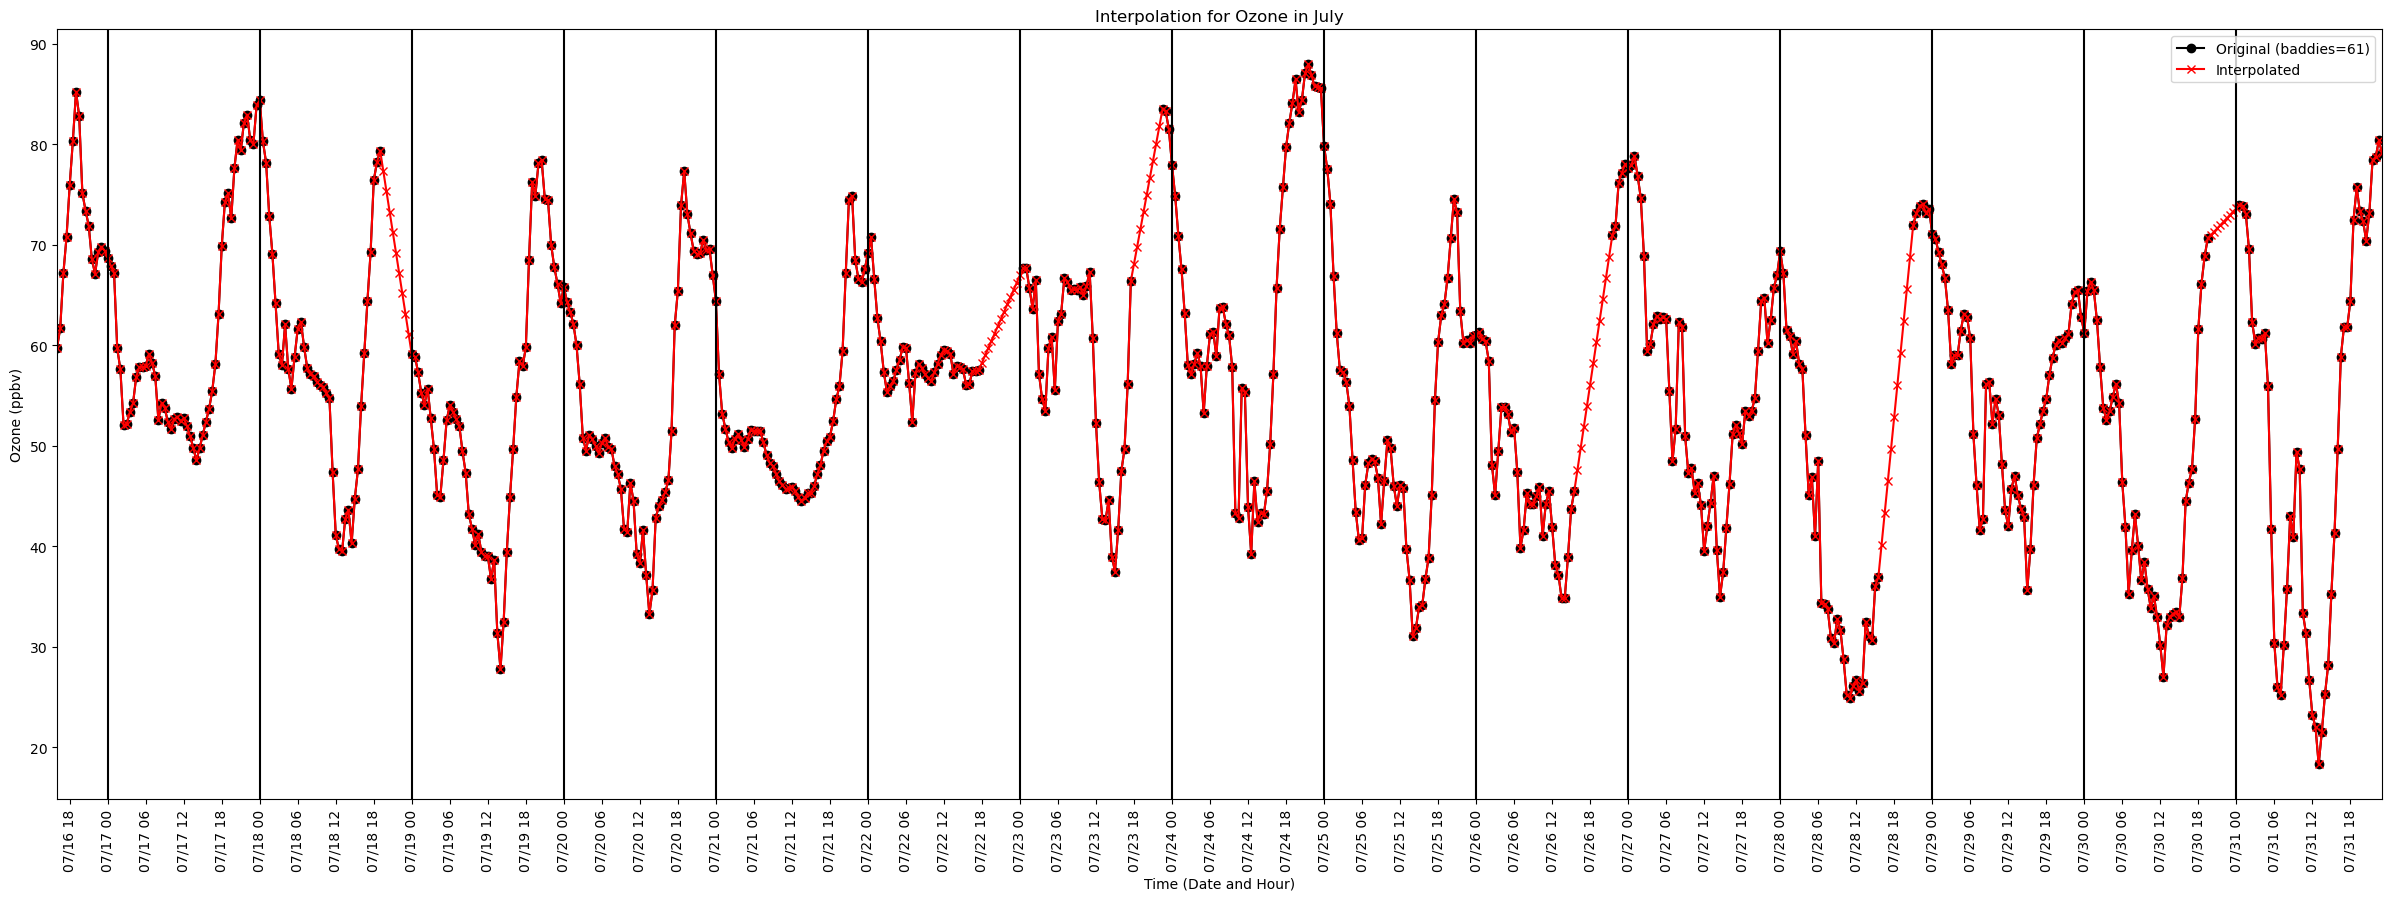

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_july_adjuststart_30min_ozone.index, df_july_adjuststart_30min_ozone['O3_ppbv'], color='k', marker='o',label=f'Original (baddies={n_baddies_july_30min})')
plt.plot(df_july_adjuststart_30min_ozone.index, df_july_adjuststart_30min_ozone['O3_ppbv_interp'], color='r', marker='x', label='Interpolated')

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_july_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_july_adjuststart_30min_ozone.index[ozone_tick_idx])
    
plt.xticks(ticks=ozone_ticks, labels=df_july_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)

# #Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(16,len(df_july_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_july_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.margins(x=0)
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.legend()
plt.title('Interpolation for Ozone in July')

Text(0.5, 1.0, 'Interpolation for Ozone in August')

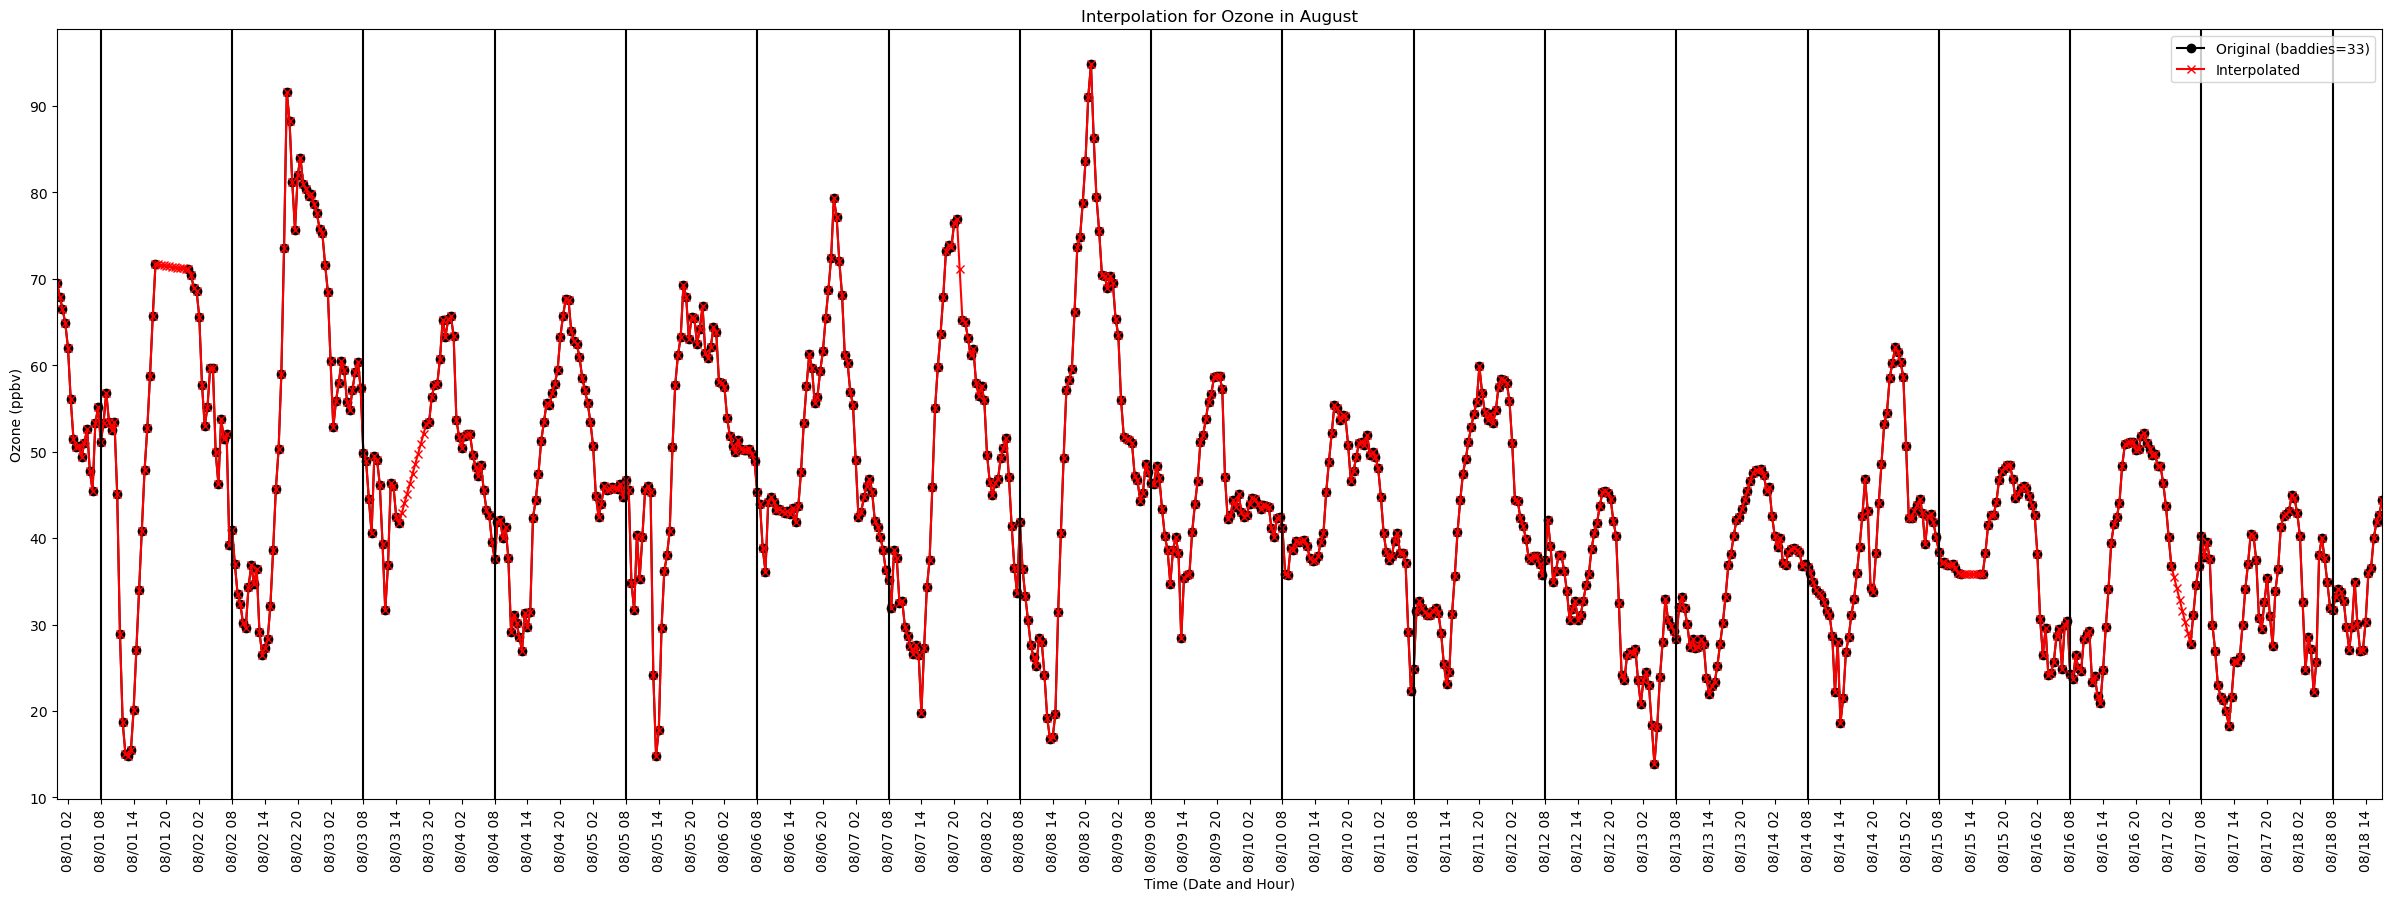

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_august_adjuststart_30min_ozone.index, df_august_adjuststart_30min_ozone['O3_ppbv'], color='k', marker='o',label=f'Original (baddies={n_baddies_august_30min})')
plt.plot(df_august_adjuststart_30min_ozone.index, df_august_adjuststart_30min_ozone['O3_ppbv_interp'], color='r', marker='x', label='Interpolated')

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_august_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_august_adjuststart_30min_ozone.index[ozone_tick_idx])
    
plt.xticks(ticks=ozone_ticks, labels=df_august_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)

# #Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(16,len(df_august_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_august_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.margins(x=0)
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.legend()
plt.title('Interpolation for Ozone in August')

In [ ]:
# Step 1: Calculate the 8-hour rolling average
df_adjuststart_30min_ozone['O3_8hr_avg'] = df_adjuststart_30min_ozone['O3_ppbv_interp'].rolling(window=16, min_periods=16).mean()
#rolling average only works for 8 hours with no gaps; at least 6 hours
#print(df_adjuststart_hourly_ozone)

# Step 2: Calculate the maximum 8-hour average for each day
# Resample to daily frequency, compute the daily max of the rolling averages, drop NA values
adjuststart_daily_max_8hr_avg_ozone_30min = df_adjuststart_30min_ozone['O3_8hr_avg'].resample('D').max().dropna()
#print('Max 8 hr avg each day:\n', adjuststart_daily_max_8hr_avg_ozone)

# Step 3: Map the daily maximum back to the original dataframe
# Create a new temporary column with the daily max 8-hour average for each timestamp
df_adjuststart_30min_ozone['MDA8_O3'] = df_adjuststart_30min_ozone.index.floor('D').map(adjuststart_daily_max_8hr_avg_ozone_30min)
#print('Daily max 8 hour avg for each timestamp: \n', df_adjuststart_hourly_ozone['MDA8_O3'])

# Select daytime values only where MD8A > 65
df_ozone_day_exceedance_30min = df_adjuststart_30min_ozone[(df_adjuststart_30min_ozone.index.hour >=7) & (df_adjuststart_30min_ozone.index.hour<=20) & (df_adjuststart_30min_ozone['MDA8_O3']>65)]
#print('When is MDA8 > 65?\n', df_ozone_day_exceedance_30min)



When is MDA8 > 65?
                        O3_ppbv  O3_ppbv_interp  O3_8hr_avg    MDA8_O3
time_UTC                                                             
2024-07-16 16:00:00  59.771677       59.771677         NaN  71.787833
2024-07-16 16:30:00  61.692203       61.692203         NaN  71.787833
2024-07-16 17:00:00  67.168889       67.168889         NaN  71.787833
2024-07-16 17:30:00  70.801556       70.801556         NaN  71.787833
2024-07-16 18:00:00  75.945000       75.945000         NaN  71.787833
2024-07-16 18:30:00  80.373889       80.373889         NaN  71.787833
2024-07-16 19:00:00  85.265556       85.265556         NaN  71.787833
2024-07-16 19:30:00  82.805556       82.805556         NaN  71.787833
2024-07-16 20:00:00  75.154000       75.154000         NaN  71.787833
2024-07-16 20:30:00  73.429333       73.429333         NaN  71.787833
2024-07-17 07:00:00  58.264556       58.264556   59.413910  73.100877
2024-07-17 07:30:00  56.999222       56.999222   58.635896  73.100877


Text(0.5, 1.0, 'MDA8 Ozone during USOS')

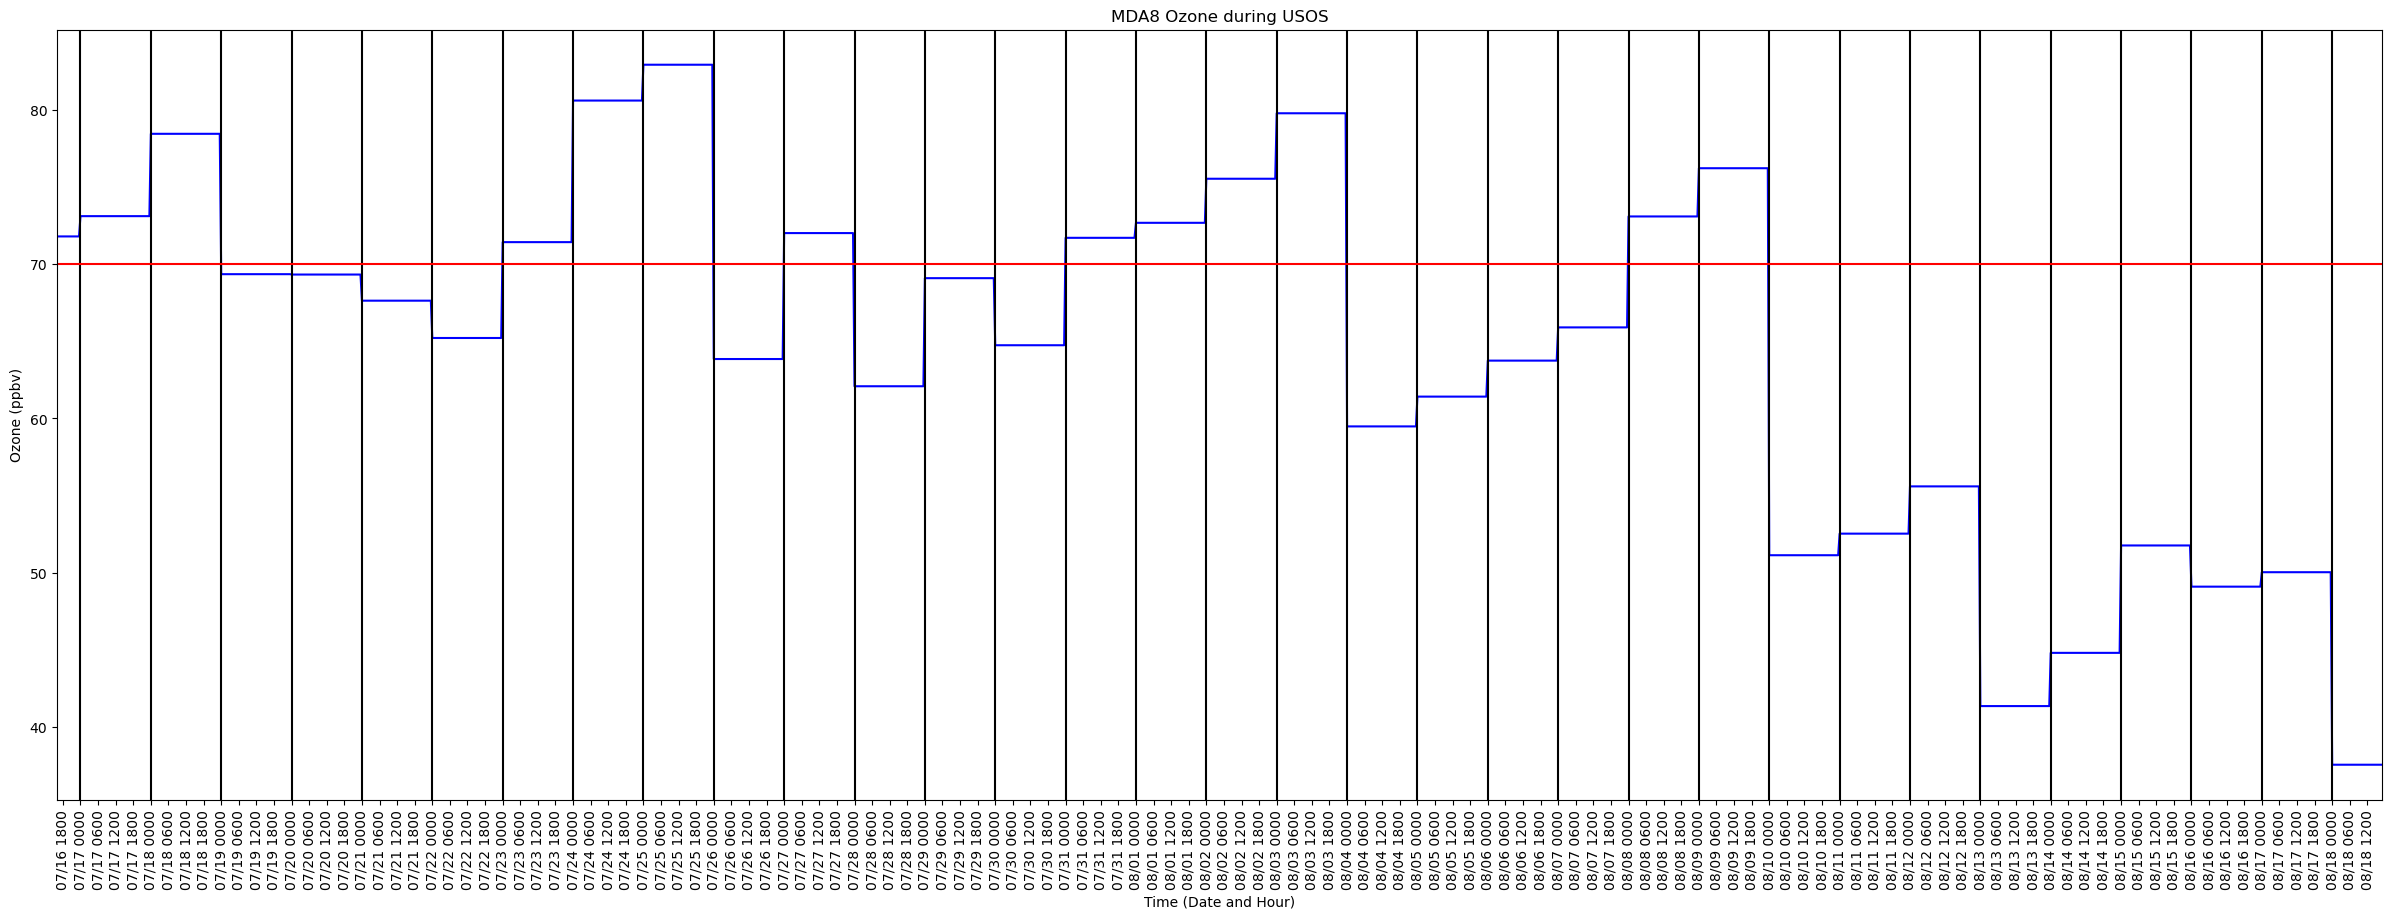

In [ ]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_adjuststart_30min_ozone.index, df_adjuststart_30min_ozone['MDA8_O3'], color='b')
plt.margins(x=0)

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_adjuststart_30min_ozone.index[ozone_tick_idx])
plt.xticks(ticks=ozone_ticks, labels=df_adjuststart_30min_ozone.index.strftime('%m/%d %H%M')[4::12], rotation = 90)

midnight_vals = []
for midnight_idx in range(16,len(df_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.hlines(y=70, xmin = df_adjuststart_30min_ozone['MDA8_O3'].index[0], xmax = df_adjuststart_30min_ozone['MDA8_O3'].index[len(df_adjuststart_30min_ozone['MDA8_O3'])-1], color = 'r')
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.title('MDA8 Ozone during USOS')

---

Text(0.5, 1.0, 'MDA8 Ozone for 30 min resolutions during USOS')

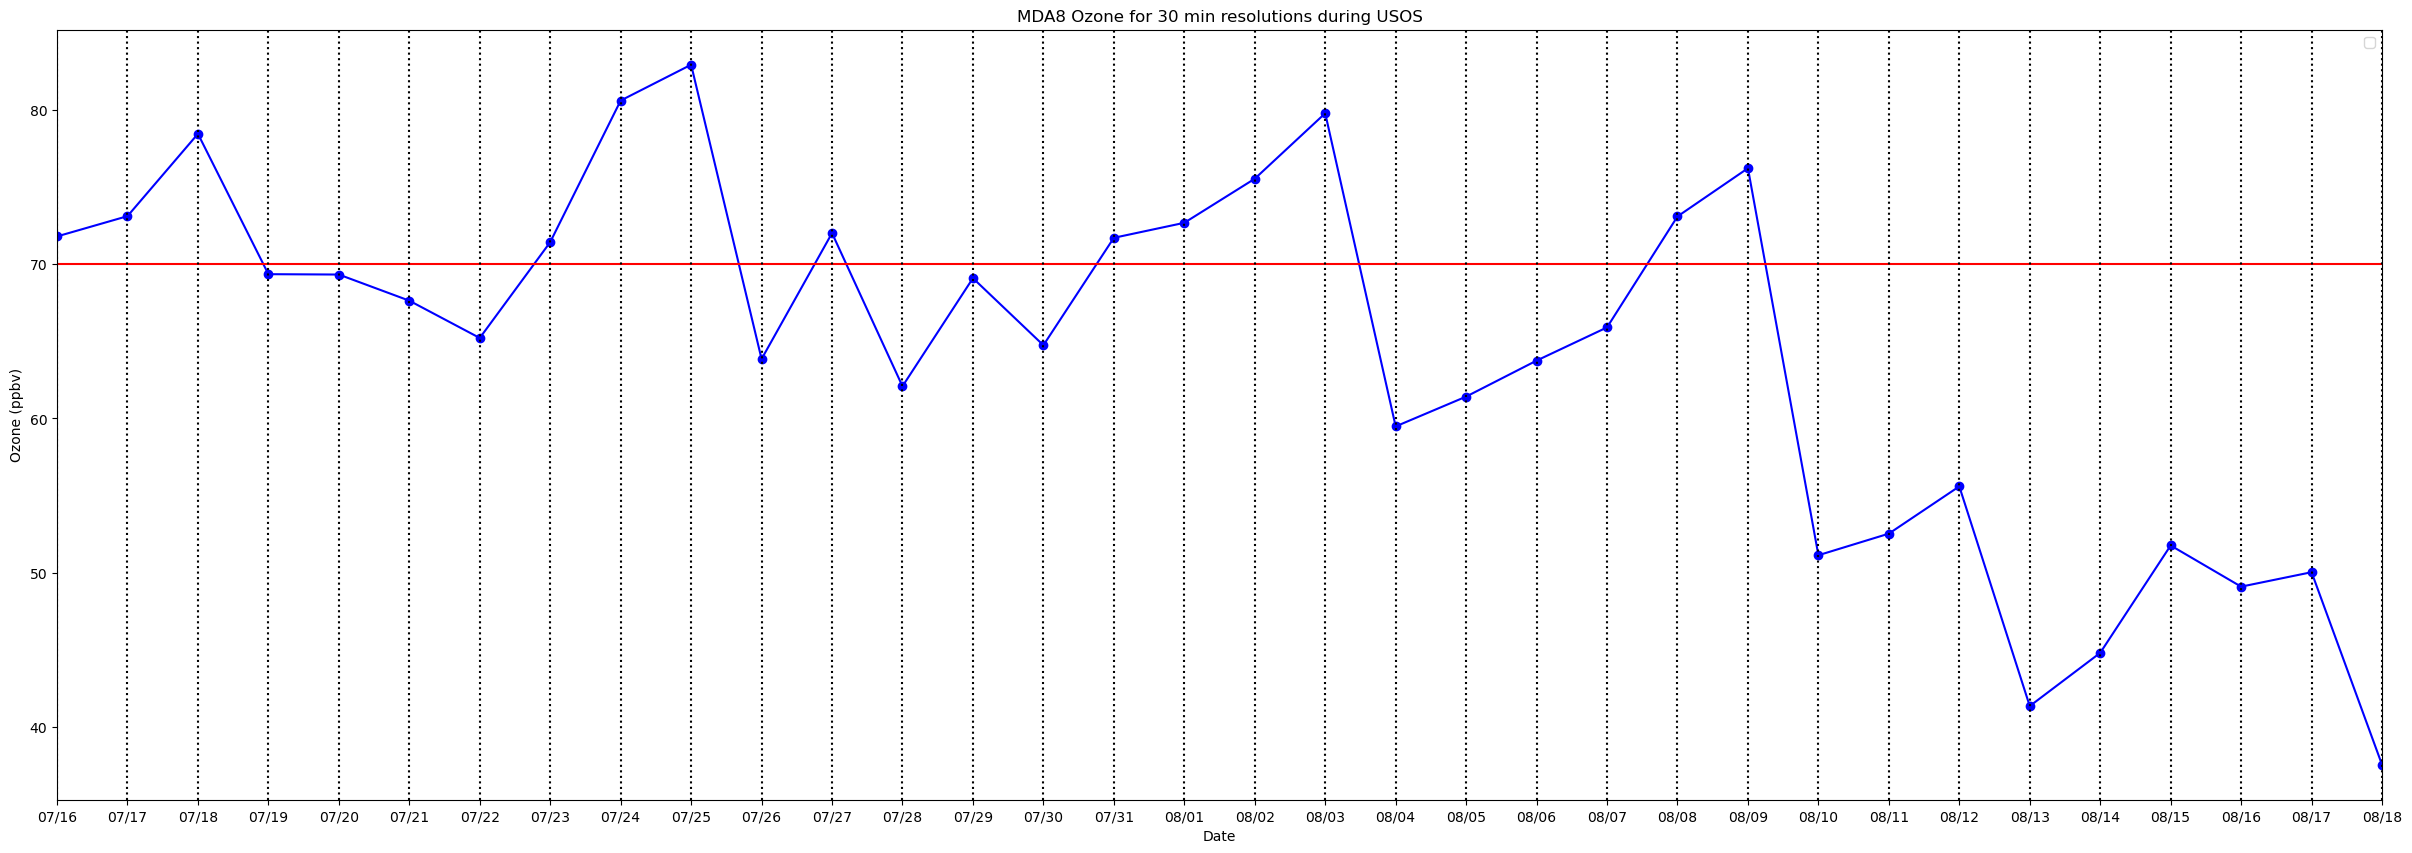

In [ ]:
fig, ax1 = plt.subplots(figsize = (30,10))

ax1.margins(x=0)

ax1.plot(df_daily_max_8hr_avg_ozone.index, df_daily_max_8hr_avg_ozone['O3_daily_max_8hr_avg'], color='b',marker='o')

ax1.set_ylabel('Ozone (ppbv)')
ax1.set_xlabel('Date')

ax1.hlines(y=70, xmin = df_daily_max_8hr_avg_ozone['O3_daily_max_8hr_avg'].index[0], xmax = df_daily_max_8hr_avg_ozone['O3_daily_max_8hr_avg'].index[len(df_daily_max_8hr_avg_ozone['O3_daily_max_8hr_avg'])-1], color = 'r')

ax1.set_xticks(df_daily_max_8hr_avg_ozone.index)
ax1.set_xticklabels(df_daily_max_8hr_avg_ozone.index.strftime('%m/%d'))

# midnight_vals_30min = []
# for midnight_idx_30min in range(16,len(df_adjuststart_30min_ozone.index),48):
#     midnight_vals_30min.append(df_adjuststart_30min_ozone.index[midnight_idx_30min])
for day_pos_30min in df_daily_max_8hr_avg_ozone.index:
    ax1.axvline(day_pos_30min, color = 'black', linestyle = 'dotted')


lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines, labels, loc=0)
plt.title('MDA8 Ozone for 30 min resolutions during USOS')

We can see that the days that are passing the MDA8 ozone of 70 ppbv are:
* 7/16, 7/17, 7/18
 <br/> 

* 7/23, 7/24, 7/25
 <br/> 

* 7/27
 <br/> 

* 7/31, 8/01, 8/02, 8/03
 <br/> 

* 8/08, 8/09